# Predicting Cervical Cancer :

Cervical cancer is one of the leading causes of cancer-related deaths among women worldwide. Early detection and accurate prediction of cervical cancer can significantly improve the chances of successful treatment and save lives. This project aims to develop a predictive model using machine learning techniques to identify individuals at high risk of cervical cancer, allowing for timely intervention and medical care. 

The main objective of this project is to build a robust machine learning model that can predict the likelihood of cervical cancer based on relevant features and patient data. By analyzing a dataset of cervical cancer cases, the model will learn patterns and correlations to make accurate predictions, enabling healthcare professionals to identify high-risk patients.

# Import Libraries :

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing Dataset :

The dataset contains various patient attributes, including demographic data, sexual behavior, smoking habits, contraceptive usage, history of sexually transmitted diseases (STDs), and diagnostic outcomes related to cervical cancer. These attributes will be used to develop a machine learning model for predicting the risk of cervical cancer, facilitating early detection and timely intervention.

In [2]:
cancer_dataframe = pd.read_csv('cervical-cancer_csv.csv')

# Exploratory Data Analysis :

Exploratory Data Analysis (EDA) for the cervical cancer dataset involves summarizing key statistics, visualizing data distributions, and identifying relationships between variables. This includes handling missing data, analyzing target variable distribution, checking for class imbalances, and detecting outliers. Correlation analysis helps understand feature relationships, and feature importance techniques can identify influential predictors. EDA insights guide data preprocessing steps like feature scaling and encoding, preparing the dataset for building a predictive model to identify cervical cancer risk accurately.

In [3]:
cancer_dataframe.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
cancer_dataframe.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
830,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
834,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.50,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
cancer_dataframe.shape

(835, 36)

In [6]:
cancer_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [7]:
cancer_dataframe.isna().any()

Age                                   False
Number of sexual partners              True
First sexual intercourse               True
Num of pregnancies                     True
Smokes                                 True
Smokes (years)                         True
Smokes (packs/year)                    True
Hormonal Contraceptives                True
Hormonal Contraceptives (years)        True
IUD                                    True
IUD (years)                            True
STDs                                   True
STDs (number)                          True
STDs:condylomatosis                    True
STDs:cervical condylomatosis           True
STDs:vaginal condylomatosis            True
STDs:vulvo-perineal condylomatosis     True
STDs:syphilis                          True
STDs:pelvic inflammatory disease       True
STDs:genital herpes                    True
STDs:molluscum contagiosum             True
STDs:AIDS                              True
STDs:HIV                        

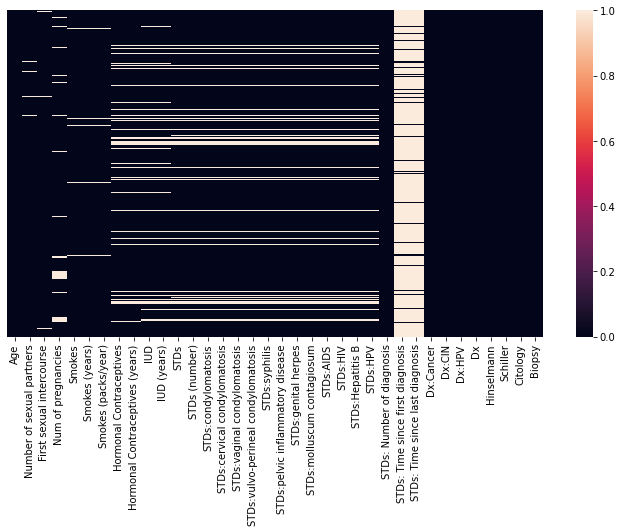

In [14]:
plt.figure(figsize = (12, 6))
sns.heatmap(cancer_dataframe.isna(), yticklabels = False)
plt.show()

In [8]:
cancer_dataframe = cancer_dataframe.replace('?', np.nan)

In [9]:
cancer_dataframe

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [11]:
cancer_dataframe.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,...,71.000000,71.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,6.140845,5.816901,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,...,5.895024,5.755271,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
cancer_dataframe.mean()

Age                                   27.023952
Number of sexual partners              2.551852
First sexual intercourse              17.020531
Num of pregnancies                     2.304236
Smokes                                 0.149635
Smokes (years)                         1.253850
Smokes (packs/year)                    0.465823
Hormonal Contraceptives                0.651639
Hormonal Contraceptives (years)        2.302916
IUD                                    0.114799
IUD (years)                            0.527621
STDs                                   0.107483
STDs (number)                          0.180952
STDs:condylomatosis                    0.059864
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005442
STDs:vulvo-perineal condylomatosis     0.058503
STDs:syphilis                          0.024490
STDs:pelvic inflammatory disease       0.001361
STDs:genital herpes                    0.001361
STDs:molluscum contagiosum             0

In [16]:
cancer_dataframe  = cancer_dataframe.fillna(cancer_dataframe.mean())

In [17]:
cancer_dataframe.isna().any()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

# Statical Info:

Statistical information in the Exploratory Data Analysis (EDA) of the cervical cancer dataset includes calculating summary statistics like mean, median, and standard deviation for numerical attributes. Visualization of data distributions through histograms and kernel density plots provides insights into data spread. Frequency distribution of categorical variables reveals the distribution of different categories.

In [18]:
cancer_dataframe.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,...,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,6.140845,5.816901,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.651365,2.805153,1.406092,0.354138,4.108329,2.238619,0.446366,3.552168,0.296809,...,1.707857,1.667369,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation Matrix :

A correlation matrix is a square matrix showing the correlation coefficients between pairs of numerical variables in the cervical cancer dataset. It helps reveal the strength and direction of relationships between attributes, ranging from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 represents a perfect negative correlation, and 0 implies no correlation. By analyzing the correlation matrix, we can identify potential dependencies and interactions among variables, assisting in feature selection and multicollinearity detection for building an accurate predictive model.

In [19]:
corr_matrix = cancer_dataframe.corr()

In [21]:
corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.070393,0.360942,0.516255,0.046625,0.213631,0.128271,0.039047,0.267937,0.264234,...,1.054546e-01,1.260276e-01,0.108519,0.059899,0.099765,0.089979,-0.009050,0.101150,-0.019194,0.054396
Number of sexual partners,0.070393,1.000000,-0.155194,0.066302,0.234549,0.174446,0.173685,-0.009221,0.010643,0.025579,...,1.856838e-02,2.770227e-02,0.020319,0.014289,0.025316,0.020654,-0.042595,-0.017298,0.014021,-0.009584
First sexual intercourse,0.360942,-0.155194,1.000000,-0.070213,-0.128780,-0.061682,-0.058716,0.003008,0.001125,-0.024437,...,1.837618e-02,2.575127e-02,0.066566,-0.033861,0.043034,0.034535,-0.018585,0.003783,-0.009438,0.008496
Num of pregnancies,0.516255,0.066302,-0.070213,1.000000,0.073625,0.170801,0.094033,0.125954,0.199409,0.194578,...,5.978954e-02,7.606569e-02,0.032414,0.006463,0.044150,0.016422,0.035146,0.087259,-0.029993,0.044011
Smokes,0.046625,0.234549,-0.128780,0.073625,1.000000,0.722303,0.492470,-0.010657,0.039673,-0.054692,...,2.301158e-02,3.089466e-02,-0.012670,-0.044132,0.010629,-0.069700,0.032292,0.052422,-0.004358,0.028471
Smokes (years),0.213631,0.174446,-0.061682,0.170801,0.722303,1.000000,0.723737,-0.017558,0.045585,0.025168,...,5.235844e-02,5.967581e-02,0.053593,-0.031877,0.056138,-0.050345,0.069674,0.094223,-0.007120,0.061448
Smokes (packs/year),0.128271,0.173685,-0.058716,0.094033,0.492470,0.723737,1.000000,0.001623,0.037833,0.006215,...,3.792510e-02,4.156486e-02,0.107777,-0.021734,0.109668,-0.034325,0.025542,0.017251,0.004477,0.024430
Hormonal Contraceptives,0.039047,-0.009221,0.003008,0.125954,-0.010657,-0.017558,0.001623,1.000000,0.444087,0.026560,...,2.300711e-02,4.026495e-02,0.023485,-0.005541,0.035531,-0.005400,0.029373,-0.005414,-0.008712,0.008858
Hormonal Contraceptives (years),0.267937,0.010643,0.001125,0.199409,0.039673,0.045585,0.037833,0.444087,1.000000,0.091109,...,7.063788e-02,8.056677e-02,0.052932,0.001884,0.059837,-0.014990,0.036274,0.078274,0.076046,0.079738
IUD,0.264234,0.025579,-0.024437,0.194578,-0.054692,0.025168,0.006215,0.026560,0.091109,1.000000,...,5.821105e-02,6.801383e-02,0.109352,0.051267,0.056945,0.137831,0.042244,0.083607,0.007454,0.051631


<AxesSubplot:>

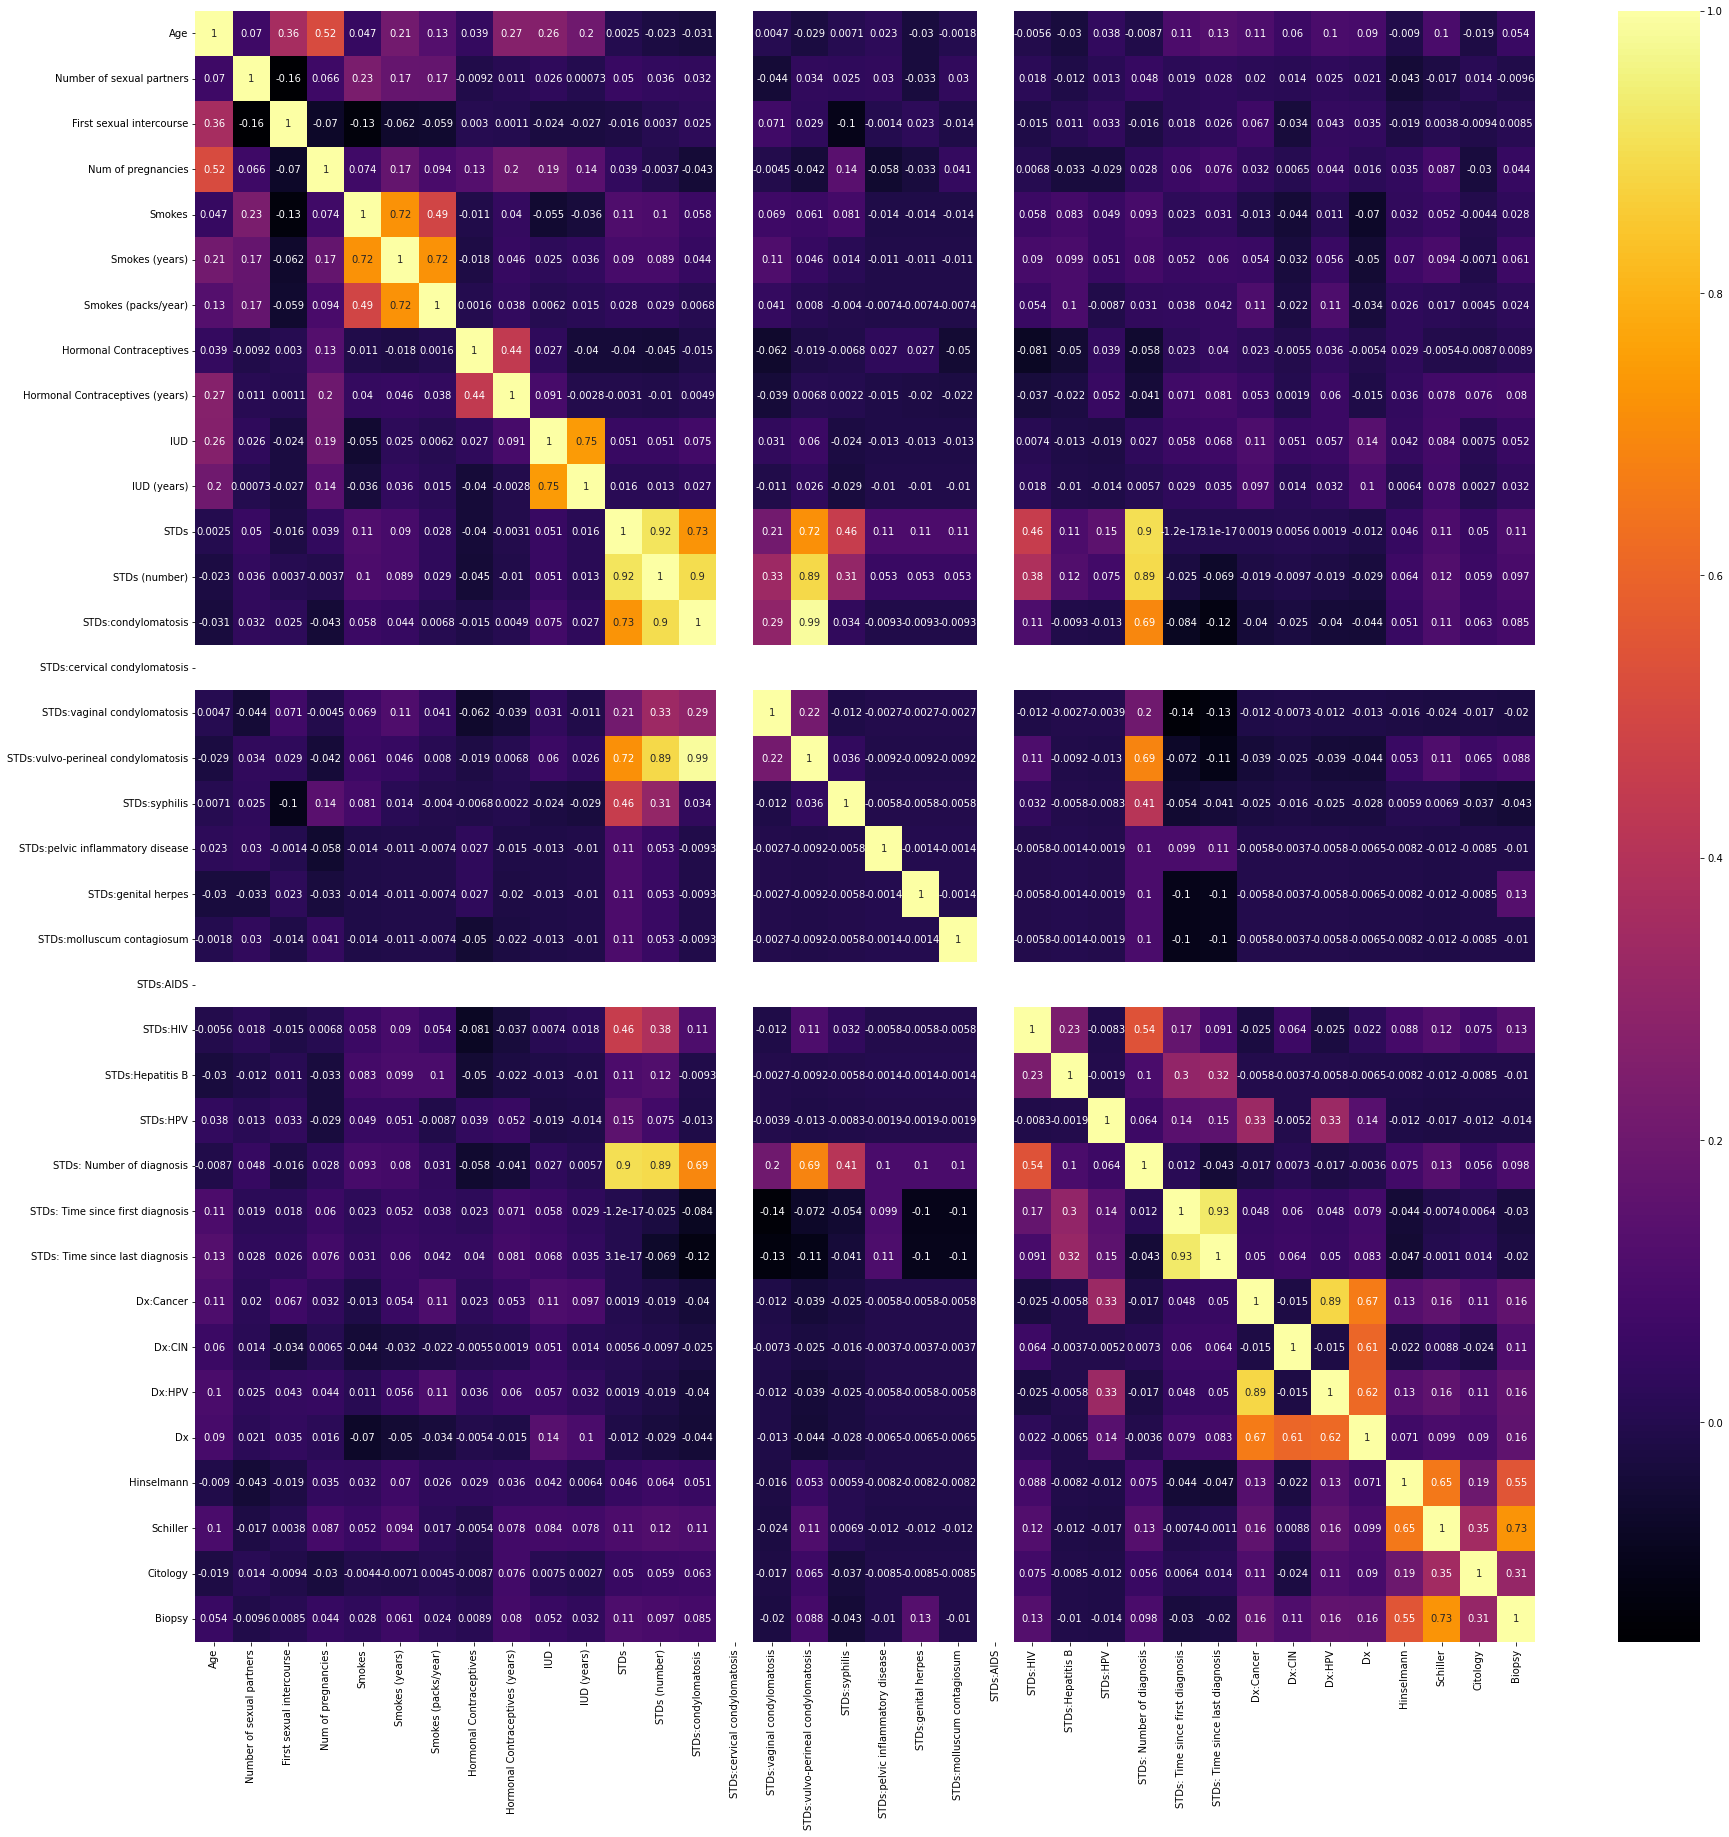

In [23]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'inferno')

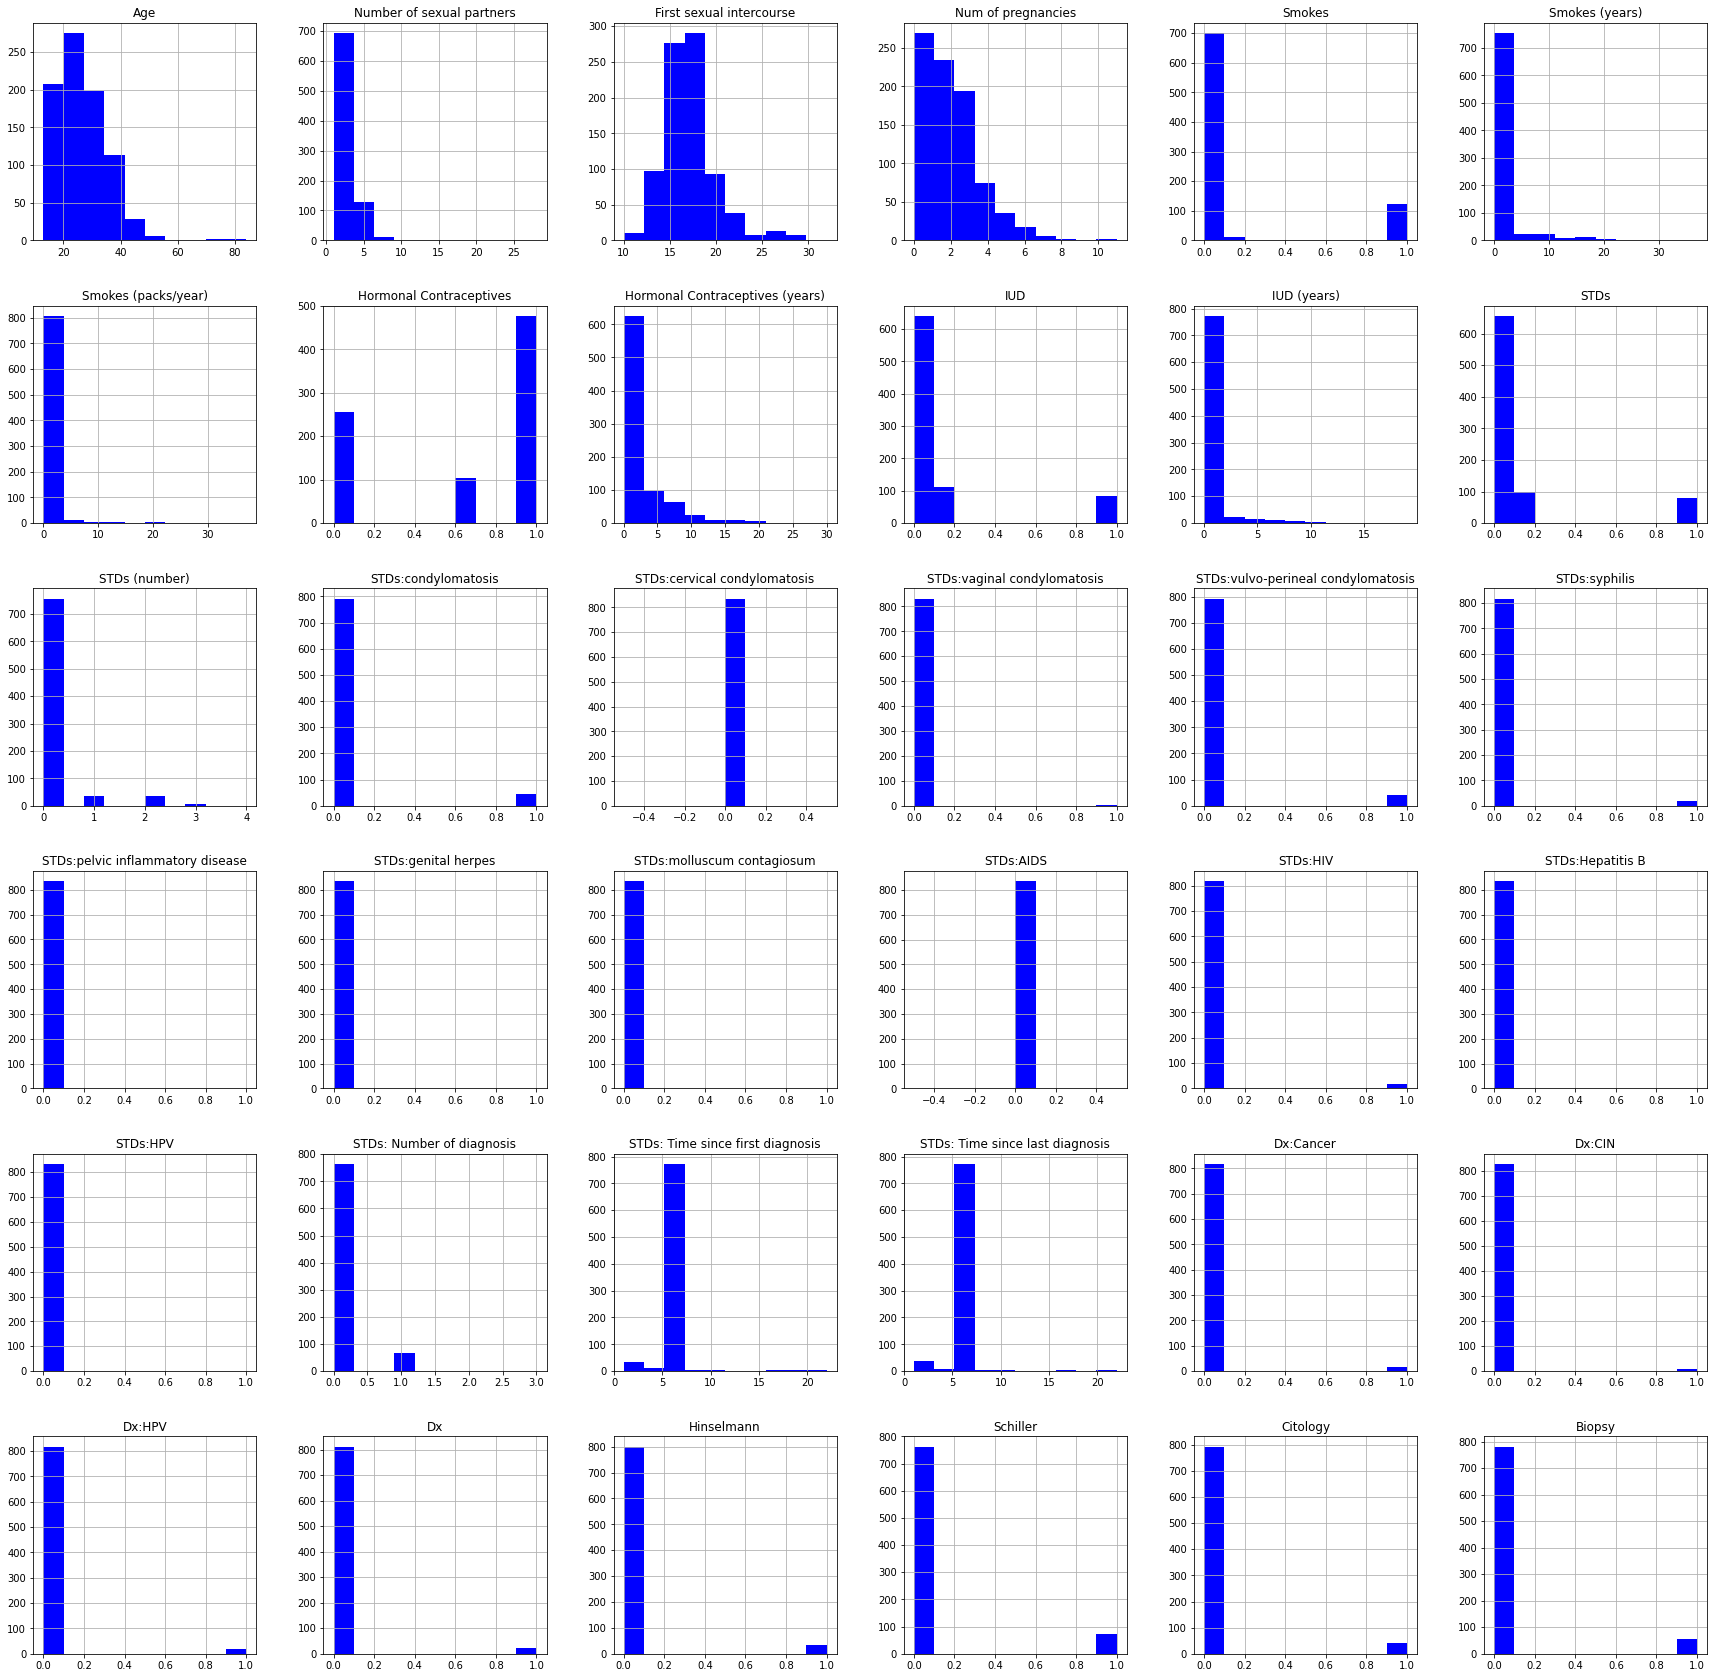

In [24]:
cancer_dataframe.hist(bins = 10, figsize = (30,30), color='blue')
plt.show()

In [26]:
cancer_dataframe.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

# Correlation Dataframe :

In [27]:
dataframe  = cancer_dataframe.drop('Biopsy', axis = 1)

In [28]:
dataframe.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,6.140845,5.816901,1,0,1,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'Correlation With Biopsy'}>

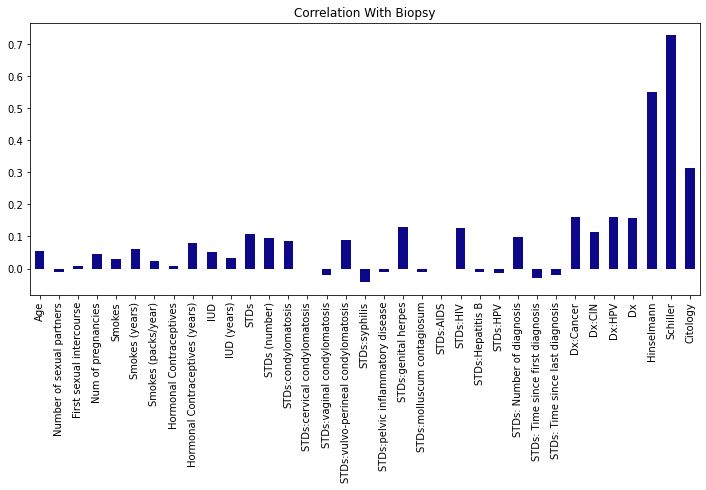

In [30]:
dataframe.corrwith(cancer_dataframe['Biopsy']).plot.bar(
    title = 'Correlation With Biopsy', 
    figsize = (12, 5), 
    cmap = 'plasma'
)

In [31]:
cancer_dataframe.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,6.140845,5.816901,1,0,1,0,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0


In [32]:
input_df = cancer_dataframe.drop('Biopsy', axis = 1)
target_df = cancer_dataframe['Biopsy']

In [35]:
x = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

In [36]:
x.shape, y.shape

((835, 35), (835,))

In [37]:
y.reshape(-1, 1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# Scaling :

Scaling is a preprocessing step in machine learning that involves transforming the features or variables of your dataset to a consistent scale. It is important because many machine learning algorithms are sensitive to the scale of the input features. Scaling helps ensure that all features have a similar range and distribution, which can improve the performance and convergence of the model.

StandardScaler is a popular scaling technique used in machine learning to standardize features by removing the mean and scaling to unit variance. It is available in the scikit-learn library, which provides a wide range of machine learning tools and preprocessing functions.

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
x = scaler.fit_transform(x)

In [42]:
x

array([[-1.0644083e+00,  8.7746584e-01, -7.2072434e-01, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       [-1.4182693e+00, -9.4030231e-01, -1.0774248e+00, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       [ 8.2285047e-01, -9.4030231e-01, -2.4769702e-07, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       ...,
       [-2.3873256e-01, -3.3437958e-01, -7.3235566e-03, ...,
        -2.0916502e-01, -3.0951661e-01,  4.2916903e+00],
       [ 7.0489675e-01, -3.3437958e-01,  2.4895792e+00, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       [ 2.3308209e-01, -3.3437958e-01,  1.0627776e+00, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01]], dtype=float32)

# Splitting Dataset:

Dataset splitting is an important step in machine learning and data analysis. It involves dividing a dataset into two or more subsets to train and evaluate a model effectively. The most common type of dataset splitting is into training and testing subsets.

Splitting the dataset into training, testing, and validation sets is crucial for effective model training and evaluation. The training set (70-80%) is used for model training, the testing set (20-30%) for performance assessment, and the validation set (10-20%) for hyperparameter tuning and preventing overfitting. This ensures the model's ability to generalize to new data and enhances its reliability. 

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2)

In [45]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((668, 35), (167, 35), (668,), (167,))

In [46]:
x_test, x_val, y_test, y_val = train_test_split(x_test, 
                                                y_test, 
                                                test_size = 0.5)

In [47]:
x_test.shape, x_val.shape, y_test.shape, y_val.shape

((83, 35), (84, 35), (83,), (84,))

In [48]:
import xgboost as xgb

In [49]:
model = xgb.XGBClassifier(learning_rate = 0.1, 
                          max_depth = 50, 
                          n_estimator = 100)

In [51]:
model.fit(x_train, y_train)

[11:06:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimator=100, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [52]:
model.score(x_train, y_train)

0.9970059880239521

In [53]:
model.score(x_test, y_test)

0.9156626506024096

In [54]:
y_pred = model.predict(x_test)

In [55]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
print(y_test[20]), print(y_pred[20])

0.0
0


(None, None)

# Errror Analysis :

Error analysis is a crucial step in the evaluation and improvement of machine learning models. It involves the systematic examination and understanding of the errors made by the model during prediction. The primary goal of error analysis is to identify patterns and sources of mistakes made by the model, which can provide valuable insights into its performance and guide improvements.

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        78
         1.0       0.25      0.20      0.22         5

    accuracy                           0.92        83
   macro avg       0.60      0.58      0.59        83
weighted avg       0.91      0.92      0.91        83



In [62]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [63]:
confusion_matrix

array([[75,  3],
       [ 4,  1]], dtype=int64)

<AxesSubplot:>

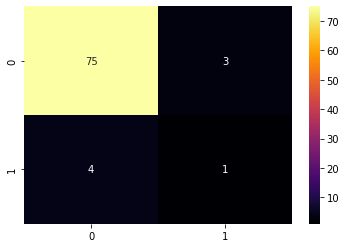

In [65]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix, 
            annot = True, 
            cmap = 'inferno')

# Thanks !